# Installing Required Libraries

To run this project, ensure you have the necessary libraries installed. You can install them using the following command:

In [1]:
%pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Preprocessing and Analysis Libraries

The provided code imports various libraries and modules commonly used for data preprocessing and analysis tasks. Here's a brief explanation of each:

- `pandas`: A powerful data manipulation library for handling data structures like DataFrames.
- `numpy`: Essential for numerical operations and array manipulations.
- `sklearn.preprocessing.LabelEncoder`: Used for encoding categorical features into numerical values.
- `sklearn.preprocessing.OneHotEncoder`: Converts categorical variables into binary vectors.
- `sklearn.preprocessing.StandardScaler`, `sklearn.preprocessing.MinMaxScaler`, `sklearn.preprocessing.RobustScaler`: Different scaling methods to standardize or normalize numerical features.
- `imblearn.over_sampling.SMOTE`: Synthetic Minority Over-sampling Technique for handling imbalanced datasets by generating synthetic samples.
- `imblearn.under_sampling.RandomUnderSampler`: Random under-sampling for balancing class distribution.
- `imblearn.combine.SMOTEENN`: Combination of over-sampling and under-sampling to balance classes.
- `sklearn.base.TransformerMixin`: A base class for creating transformers in scikit-learn pipelines.
- `sklearn.pipeline.Pipeline`: Streamlines a lot of routine processes, encapsulating a sequence of data preprocessing steps.
- `matplotlib.pyplot` and `seaborn`: Data visualization libraries for creating plots and charts.
- `sklearn.model_selection.train_test_split`: Splits data into training and testing sets.
- `sklearn.preprocessing.PolynomialFeatures`: Generates polynomial features for a dataset.
- `sklearn.pipeline.make_pipeline`: Creates a pipeline with a series of processing steps.
- `sklearn.linear_model.LogisticRegression`: Implements logistic regression for classification tasks.
- `sklearn.metrics`: Various metrics for evaluating model performance, including accuracy, confusion matrix, and classification report.
- `sklearn.metrics.auc`, `sklearn.metrics.roc_curve`: Evaluation metrics for binary classification models.

Additionally, custom functions from the `data_utils` module are imported for specific data preprocessing tasks.


In [2]:
# The code is importing various libraries and modules that are commonly used in data preprocessing and analysis tasks. 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve

# These functions are likely custom functions that have been defined in the `data_utils` module
# to perform specific data preprocessing tasks. By importing these functions, the code can use 
# them to preprocess the data in a convenient and modular way.
from data_utils import prepare_data,label_encode_data,onehot_encode_data,frequency_encode_data,scale_data,balance_data,drop_columns

# Reading Data from CSV Files

The provided code utilizes the `pandas` library to read data from two CSV files, namely 'fraudTrain.csv' and 'fraudTest.csv', both located in the 'data' directory. The data from each file is loaded into separate Pandas DataFrames:

In [3]:
# The code is using the pandas library to read two CSV files named 'fraudTrain.csv' and 'fraudTest.csv' 
# located in the 'data' directory. The data from each CSV file is then assigned to two separate variables 
# called `fraud_fraud_df` and `fraud_test`, respectively.
fraud_train_df=pd.read_csv('data/fraudTrain.csv')
fraud_test=pd.read_csv('data/fraudTest.csv')


# Data Preprocessing using Custom Function

The code applies a custom function called `prepare_data` to preprocess the `fraud_df` (training data) and `fraud_test` (test data) DataFrames. This function is defined in the `data_utils` module and performs specific data preprocessing tasks. Here's an overview of the code:


In [4]:
# Preprocessing train data using the 'prepare_data' function
fraud_df_pre=prepare_data(fraud_train_df)
# Preprocessing test data using the 'prepare_data' function
fraud_df_test=prepare_data(fraud_test)

# Graphs

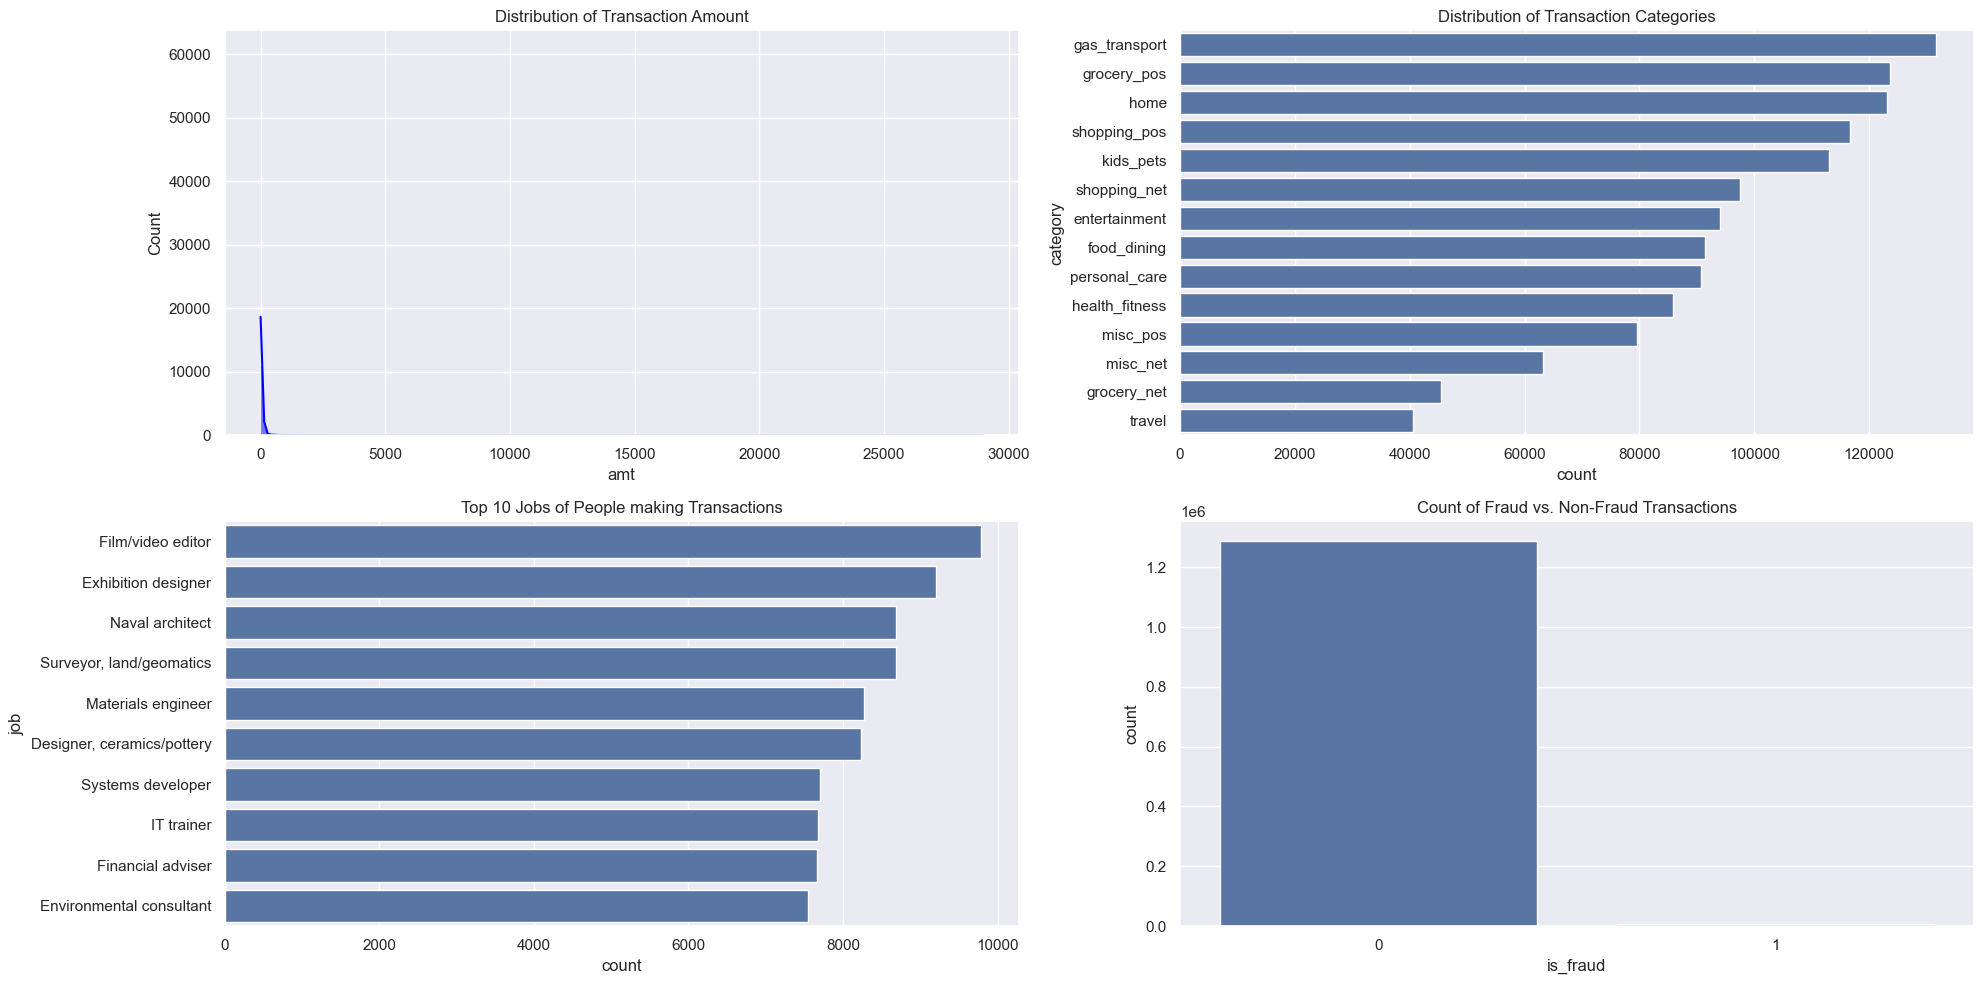

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme()

# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20, 10))

# Plotting the distribution of Transaction amount
ax1 = fig.add_subplot(221)
sns.histplot(data=fraud_df_pre, x="amt", kde=True, color='blue', ax=ax1)
ax1.title.set_text('Distribution of Transaction Amount')

# Plotting the distribution of Transaction categories
ax2 = fig.add_subplot(222)
sns.countplot(y="category", data=fraud_df_pre, ax=ax2, order=fraud_df_pre["category"].value_counts().index)
ax2.title.set_text('Distribution of Transaction Categories')

# Plotting the distribution of jobs
ax3 = fig.add_subplot(223)
sns.countplot(y="job", data=fraud_df_pre, ax=ax3, order=fraud_df_pre["job"].value_counts().index[:10])
ax3.title.set_text('Top 10 Jobs of People making Transactions')

# Plotting Fraud vs. Non-Fraud Transactions
ax4 = fig.add_subplot(224)
sns.countplot(x="is_fraud", data=fraud_df_pre, ax=ax4)
ax4.title.set_text('Count of Fraud vs. Non-Fraud Transactions')

# Auto-adjust subplot params so that the subplotS fits into the figure area.
plt.tight_layout()

# Plotting the Figures
plt.show()

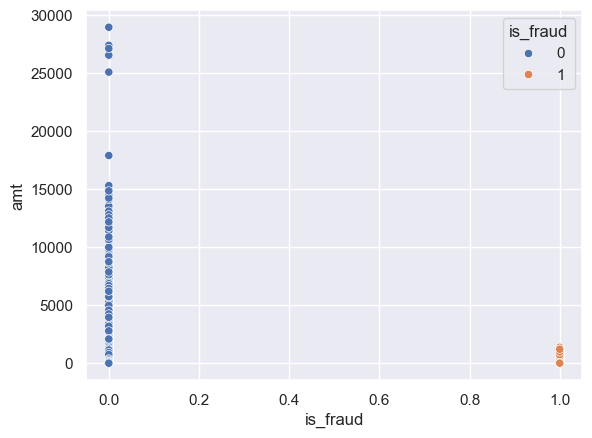

In [6]:
# Creating a scatterplot using seaborn
sns.scatterplot(x= "is_fraud", y = "amt", hue = "is_fraud", data = fraud_df_pre)

# Display the plot
plt.show()

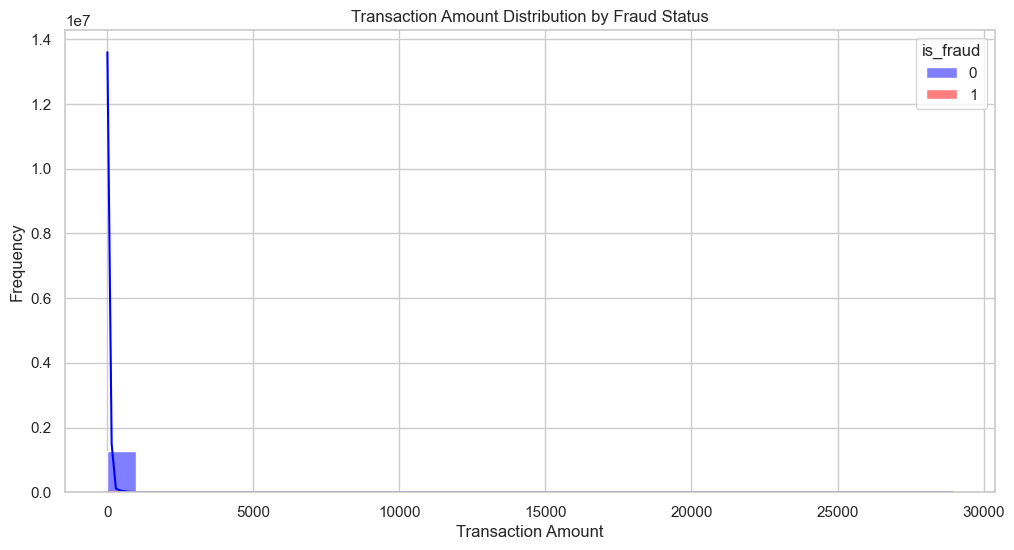

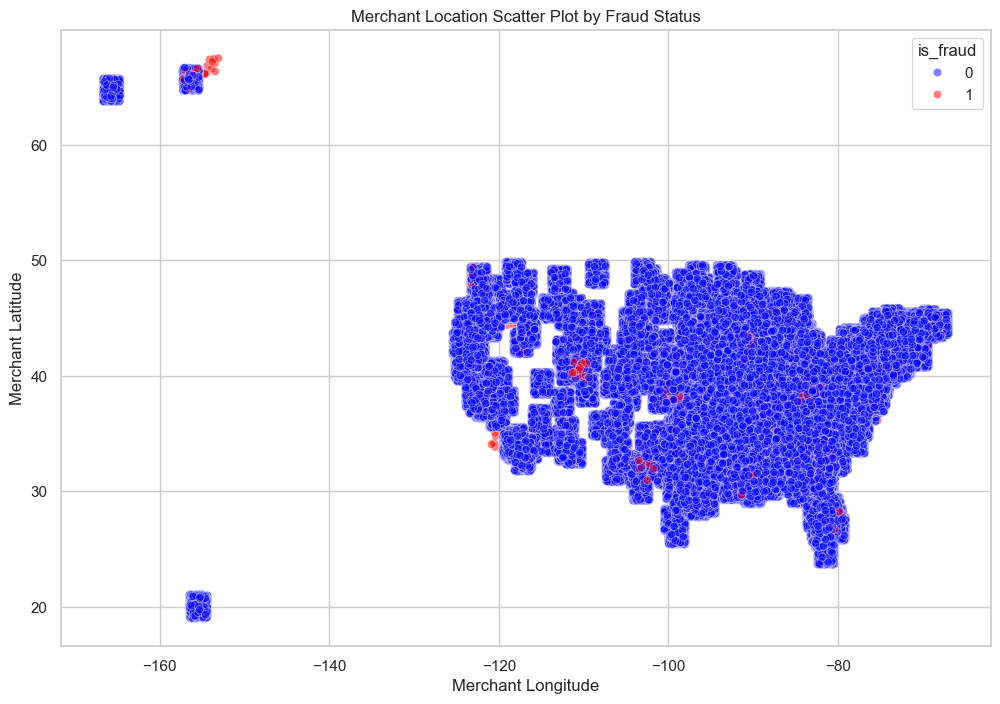

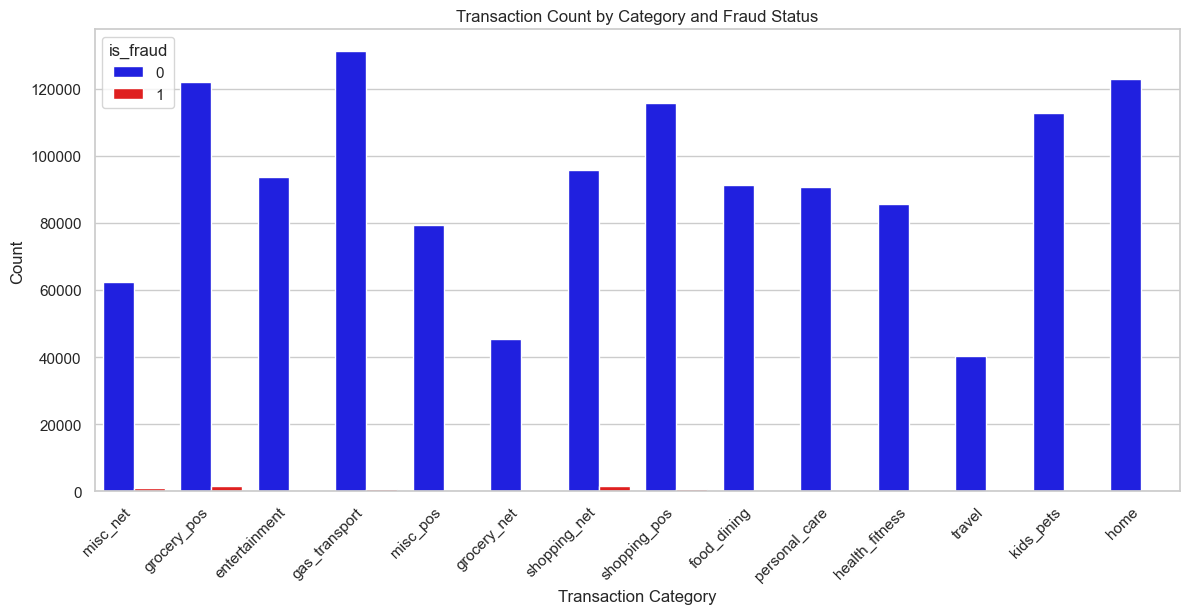

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot a histogram of 'amt' colored by 'is_fraud'
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_train_df, x='amt', hue='is_fraud', bins=30, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot a scatter plot of 'merch_long' vs 'merch_lat' colored by 'is_fraud'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_train_df, x='merch_long', y='merch_lat', hue='is_fraud', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Merchant Location Scatter Plot by Fraud Status')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.show()

# Plot a bar plot of 'category' counts colored by 'is_fraud'
plt.figure(figsize=(14, 6))
sns.countplot(data=fraud_train_df, x='category', hue='is_fraud', palette={0: 'blue', 1: 'red'})
plt.title('Transaction Count by Category and Fraud Status')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Checking Data After Preparing Initially

In [8]:
fraud_df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   lat                    1296675 non-null  float64       
 10  long                   1296675 non-null  float64       
 11  city_pop               1296675 non-null  int64         
 12  job                    12966

In [9]:
fraud_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   gender                 555719 non-null  object        
 6   street                 555719 non-null  object        
 7   city                   555719 non-null  object        
 8   state                  555719 non-null  object        
 9   lat                    555719 non-null  float64       
 10  long                   555719 non-null  float64       
 11  city_pop               555719 non-null  int64         
 12  job                    555719 non-null  obje

In [10]:
fraud_df_pre.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_time',
       'trans_date', 'trans_month', 'age', 'during_officehours', 'day_type',
       'day_of_month', 'day_of_week'],
      dtype='object')

In [11]:
fraud_df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_time',
       'trans_date', 'trans_month', 'age', 'during_officehours', 'day_type',
       'day_of_month', 'day_of_week'],
      dtype='object')

# Data Encoding and Feature Engineering

The code snippet showcases a series of data encoding and feature engineering steps applied to the preprocessed training (`fraud_df_pre`) and test (`fraud_df_test`) DataFrames. Let's break down each step:

1. **Label Encoding**: Numeric encoding is applied to categorical columns for both training and test data.

2. **Frequency Encoding**: Encoding is performed based on the frequency of occurrences of unique credit card numbers (`cc_num`) in both training and test data.

3. **One-Hot Encoding**: Categorical columns 'day_type' and 'gender' are one-hot encoded for both training and test data.



In [12]:
fraud_df_pre=label_encode_data(fraud_df_pre,['city_pop','category','job','merchant','city','street','state'])
fraud_df_test=label_encode_data(fraud_df_test,['city_pop','category','job','merchant','city','street','state'])

fraud_df_pre=frequency_encode_data(fraud_df_pre,['cc_num'])
fraud_df_test=frequency_encode_data(fraud_df_test,['cc_num'])

fraud_df_pre=onehot_encode_data(fraud_df_pre,['day_type'])
fraud_df_pre=onehot_encode_data(fraud_df_pre,['gender'])
fraud_df_test=onehot_encode_data(fraud_df_test,['day_type'])
fraud_df_test=onehot_encode_data(fraud_df_test,['gender'])

# Dropping Unnecessary Columns

The code snippet removes unnecessary columns from the preprocessed training (`fraud_df_pre`) and test (`fraud_df_test`) DataFrames. The specified columns are dropped using a custom function called `drop_columns`.

In [13]:
fraud_df_pre=drop_columns(fraud_df_pre, ['trans_date_trans_time','trans_time','trans_date','dob','merch_lat','merch_long','lat','long','during_officehours'])
fraud_df_test=drop_columns(fraud_df_test, ['trans_date_trans_time','trans_time','trans_date','dob','merch_lat','merch_long','lat','long','during_officehours'])

# Feature Scaling

The code snippet illustrates the application of feature scaling to the training (`fraud_df_pre`) and test (`fraud_df_test`) DataFrames. Feature scaling is a critical preprocessing step that ensures all features contribute equally to machine learning models. In this case, the code provides flexibility in choosing between different scaling methods: 'standard', 'minmax', or 'robust'.


In [14]:
columns=fraud_df_pre.drop(columns='is_fraud').columns
fraud_df_pre=scale_data(fraud_df_pre,columns,'standard')

columns_t=fraud_df_test.drop(columns='is_fraud').columns
fraud_df_test=scale_data(fraud_df_test,columns_t,'standard')

# Handling Missing Values

The provided code removes rows containing missing values (NaN) from the preprocessed training (`fraud_df_pre`) and test (`fraud_df_test`) DataFrames. Here's a concise explanation:

In [15]:
fraud_df_pre=fraud_df_pre.dropna(axis=0)
fraud_df_test=fraud_df_test.dropna(axis=0)

# Dataset Information

After the preprocessing steps, the code snippet prints the information about the preprocessed training dataset (`fraud_df_pre`). This information typically includes details about the DataFrame's structure, non-null counts, and data types of columns.

In [16]:
fraud_df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   is_fraud                   1296675 non-null  int64  
 1   cc_num                     1296675 non-null  float64
 2   merchant                   1296675 non-null  float64
 3   category                   1296675 non-null  float64
 4   amt                        1296675 non-null  float64
 5   street                     1296675 non-null  float64
 6   city                       1296675 non-null  float64
 7   state                      1296675 non-null  float64
 8   city_pop                   1296675 non-null  float64
 9   job                        1296675 non-null  float64
 10  unix_time                  1296675 non-null  float64
 11  trans_month                1296675 non-null  float64
 12  age                        1296675 non-null  float64
 13  day_of_month

In [17]:
fraud_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   is_fraud                   555719 non-null  int64  
 1   cc_num                     555719 non-null  float64
 2   merchant                   555719 non-null  float64
 3   category                   555719 non-null  float64
 4   amt                        555719 non-null  float64
 5   street                     555719 non-null  float64
 6   city                       555719 non-null  float64
 7   state                      555719 non-null  float64
 8   city_pop                   555719 non-null  float64
 9   job                        555719 non-null  float64
 10  unix_time                  555719 non-null  float64
 11  trans_month                555719 non-null  float64
 12  age                        555719 non-null  float64
 13  day_of_month               55

# Handling Class Imbalance using SMOTE/random_underampling

The code snippet showcases the application of the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in the preprocessed training dataset (`fraud_df_pre`). The parameter 'smote' indicates the specific method used for handling imbalance. Other options include 'smotenn' (combining SMOTE and Edited Nearest Neighbors) and 'random_undersampling'.

In [18]:
# Balancing the training data using SMOTE or other methods
fraud_df_pre=balance_data(fraud_df_pre,'random_undersampling')

is_fraud
0    7506
1    7506
Name: count, dtype: int64


# Saving Cleaned Datasets

The code snippet saves the cleaned and preprocessed training and test datasets to CSV files.

In [19]:
# Saving the cleaned training data to a CSV file
fraud_df_pre.to_csv('clean_train_data.csv', index=False)

# Saving the cleaned test data to a CSV file
fraud_df_test.to_csv('clean_test_data.csv', index=False)

# Creating Resampled Training and Validation Sets

The provided code snippet separates the target variable 'is_fraud' from the feature sets for both the resampled training and validation datasets.

In [20]:
# Creating resampled training set
y_resampled = fraud_df_pre['is_fraud']
X_resampled = fraud_df_pre.drop(columns=['is_fraud'])

# Creating resampled validation set
y_validation_resampled = fraud_df_test['is_fraud']
X_validation_resampled = fraud_df_test.drop(columns=['is_fraud'])

# Deleting Dataframes from Memory

The code snippet deletes the DataFrames `fraud_df_pre` and `fraud_df_test` from the memory.

In [21]:
del fraud_df_pre
del fraud_df_test

# Polynomial Regression with Logistic Regression

The code snippet demonstrates the implementation of Polynomial Regression using Logistic Regression as the base model.


In [22]:
# The degree of the polynomial
degree = 2

# Initialize the PolynomialFeatures
poly_features = PolynomialFeatures(degree=degree)

# Defining the model with hyperparameter
model=LogisticRegression(
    max_iter=3000,
    C=0.001,
    penalty='l2',
    solver='lbfgs',
    tol=1e-4,
    fit_intercept=True,
    class_weight={0:1,1:1.5},
    random_state=42,
    multi_class='ovr'
)

# Create a pipeline of Polynomial features and Logistic regression
pipeline_deg1 = make_pipeline(poly_features, model)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

# fit the model
pipeline_deg1.fit(X_train, y_train)

# Prediction
y_pred = pipeline_deg1.predict(X_test)

# Print performance metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8511488511488512
Confusion Matrix: 
 [[1364  143]
 [ 304 1192]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1507
           1       0.89      0.80      0.84      1496

    accuracy                           0.85      3003
   macro avg       0.86      0.85      0.85      3003
weighted avg       0.86      0.85      0.85      3003



# Model Evaluation on Validation Data

The code snippet predicts the target variable on the validation data using the trained Polynomial Regression with Logistic Regression model.

In [23]:
# Prediction
y_pred_valid = pipeline_deg1.predict(X_validation_resampled)

# Print performance metrics
print('Accuracy: ', accuracy_score(y_validation_resampled, y_pred_valid))
print('Confusion Matrix: \n', confusion_matrix(y_validation_resampled, y_pred_valid))

Accuracy:  0.8973204083358676
Confusion Matrix: 
 [[496983  56591]
 [   470   1675]]


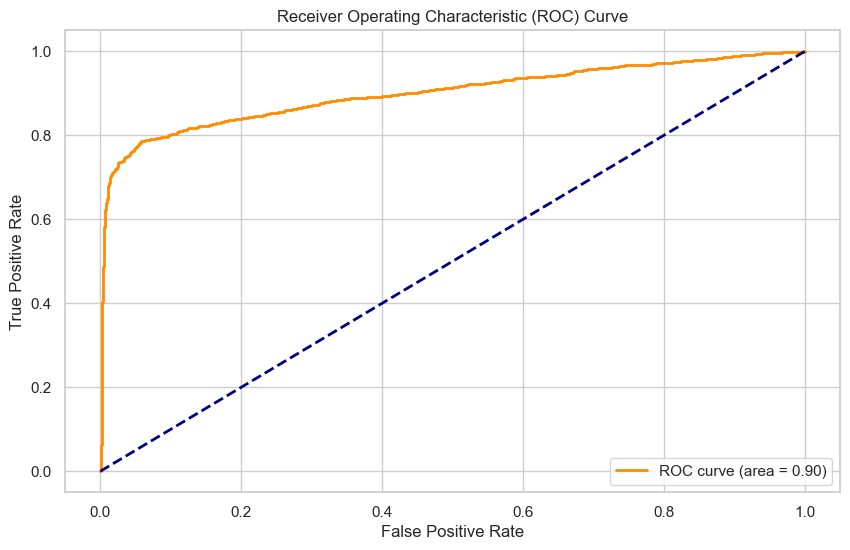

In [24]:
y_scores_deg1 = pipeline_deg1.decision_function(X_test)
fpr_deg1, tpr_deg1, thresholds_deg1 = roc_curve(y_test, y_scores_deg1)
roc_auc_deg1 = auc(fpr_deg1, tpr_deg1)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_deg1, tpr_deg1, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_deg1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Define the degree of the polynomial
degree = 2

# Initialize the PolynomialFeatures
poly_features = PolynomialFeatures(degree=degree)

# Create a pipeline of Polynomial features and Logistic regression
pipeline_deg2 = make_pipeline(poly_features, LogisticRegression(max_iter=2000,C=0.001))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

# fit the model
pipeline_deg2.fit(X_train, y_train)

# Prediction
y_pred = pipeline_deg2.predict(X_test)

# Print performance metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8551448551448552
Confusion Matrix: 
 [[1446   61]
 [ 374 1122]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1507
           1       0.95      0.75      0.84      1496

    accuracy                           0.86      3003
   macro avg       0.87      0.85      0.85      3003
weighted avg       0.87      0.86      0.85      3003



In [26]:
# Prediction
y_pred_valid = pipeline_deg2.predict(X_validation_resampled)

# Print performance metrics
print('Accuracy: ', accuracy_score(y_validation_resampled, y_pred_valid))
print('Confusion Matrix: \n', confusion_matrix(y_validation_resampled, y_pred_valid))
print('Classification Report: \n', classification_report(y_validation_resampled, y_pred_valid))

Accuracy:  0.956679544877897
Confusion Matrix: 
 [[530076  23498]
 [   576   1569]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.06      0.73      0.12      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.84      0.55    555719
weighted avg       1.00      0.96      0.97    555719



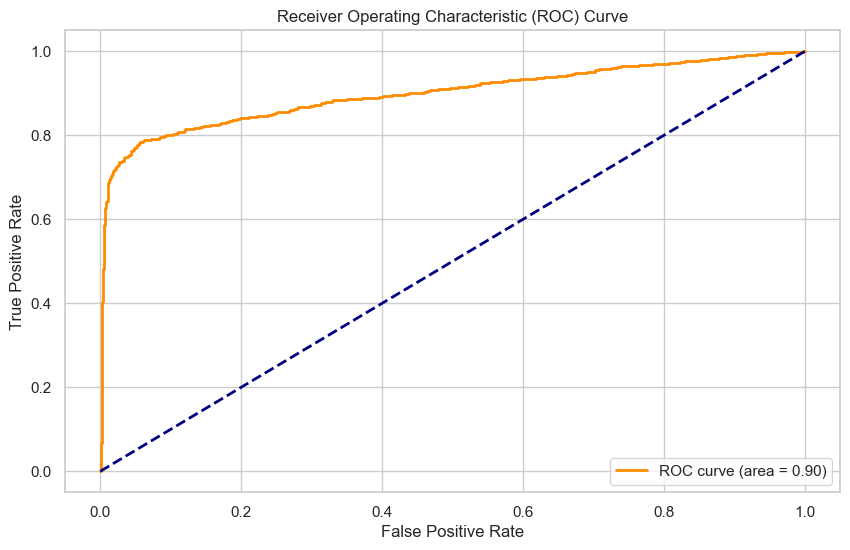

In [27]:
y_scores_deg2 = pipeline_deg2.decision_function(X_test)
fpr_deg2, tpr_deg2, thresholds_deg2 = roc_curve(y_test, y_scores_deg2)
roc_auc_deg2 = auc(fpr_deg2, tpr_deg2)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_deg2, tpr_deg2, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_deg2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()